### Salary is a fixed amout of money or compensation paid to an employee by employer. Salary is paid in fixed interval in time. The salary is based on various parameters like experience,fresher,post etc. Employees get salary according to their abilities.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv("Salary")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [32]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

## About the Columns

    1.Rank
        Rank is nothing but the position of the person and the salary  given to a person is according to a rank.
    
    2.Discipline
        Discipline is nothing but the rules and regulation which follows by every employee.
        
    3.Yrs.since.phd
        This colums shows that the years of phd completed.
        
    4.Yrs.service
         Yrs. of service column shows that from how many years that employee working in other words year of experience in                service.
         
    5.Sex
        It shows that the working employee is a male or female
        
    6.Salary 
        It shows the salry of employee according to given data.
        

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


## EDA


### Scatterplot

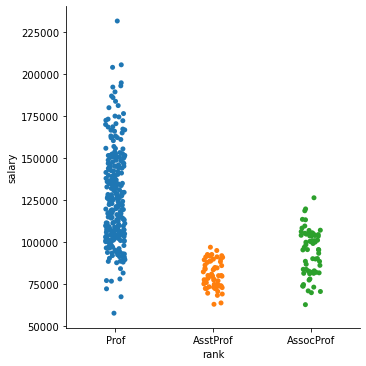

In [34]:
sns.catplot(x='rank',y='salary',data=df)

From above scatter plot we seen that Proffesor has the more salary and Assistant proffesor has the low salary.

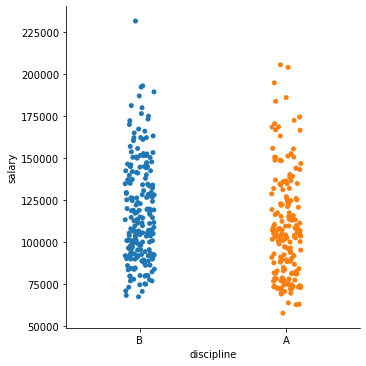

In [35]:
sns.catplot(x='discipline',y='salary',data=df)

Discipline A has the more salary than discipline B.

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

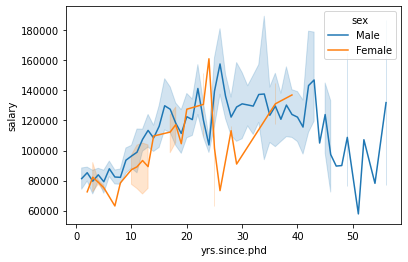

In [36]:
sns.lineplot(x='yrs.since.phd',y='salary',data=df,hue='sex')

As majority says from above scatterplot who has less years since phd has the less salary.

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

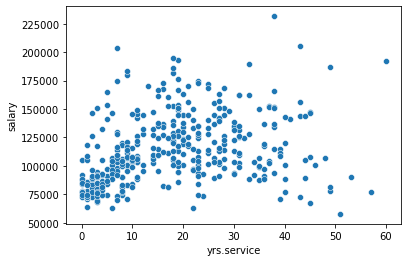

In [37]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

As shown in above scatterplot less number of years of service has less number of salary.

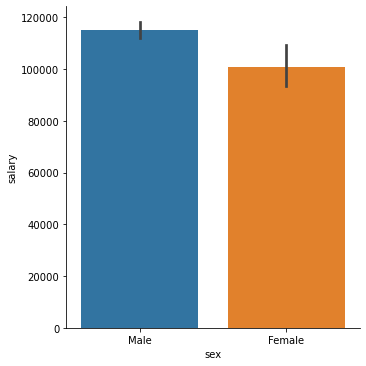

In [38]:
sns.catplot(x='sex',y='salary',data=df,kind="bar")

From above graph we can see that Male has got more salary than Female.

In [39]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [40]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [41]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [42]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

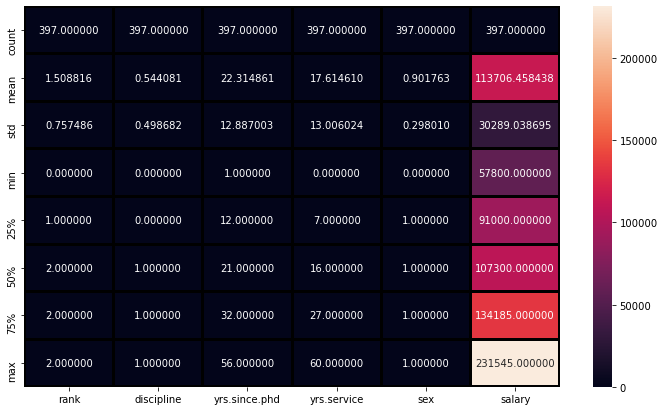

In [43]:
plt.figure(figsize=(12,7))
sns.heatmap(df.describe(),annot=True,linewidths=2,linecolor="black",fmt="f")

### Outcome of Describe Dataset

From the above plotting we are determining mean,standard deviation,minimum and maximum value of each column.It helps us further cleaning the data.

Rank 1.Mean-1.50, 2.Std-0.75, 3.Min-0, Max-2

Discipline 1.Mean-0.54, 2.Std-0.49, 3.Min-0, Max-1

Yrs.since.phd 1.Mean-22.31, 2.Std-12.88, 3.Min-1, Max-56

Yrs.service 1.Mean-17.61, 2.Std-13, 3.Min-0, Max-60

Sex 1.Mean-0.90, 2.Std-0.29, 3.Min-0, Max-1

Salary 1.Mean-113706.45, 2.Std-30289.03, 3.Min-57800, Max-231545




### Correlation

In [44]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

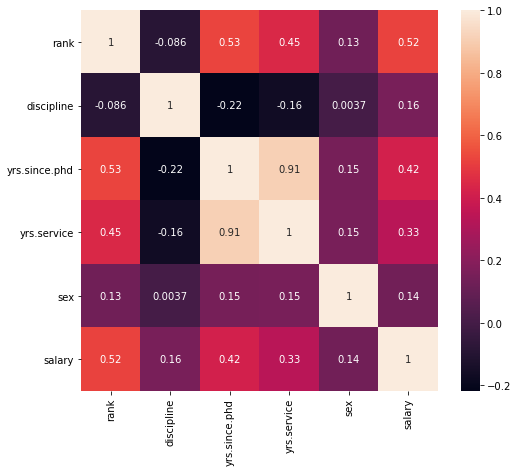

In [45]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)

### Outcome of Correlation

As we seen from above heatmap all the columns of dataset are positively correlated with the Salary.

Rank has 52 percent correlation with the target column which is very strong. Discipline has the 16 percent correlation with the target column. Yrs.since.phd has the 42 percent correlation with the target column which is good bond. Yrs.service has a 33 percent correlation with the target column.Sex is the 14 percent correlation with the target column.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   discipline     397 non-null    float64
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    int64  
 4   sex            397 non-null    float64
 5   salary         397 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.7 KB


### Checking Outliers

<AxesSubplot:xlabel='yrs.since.phd'>

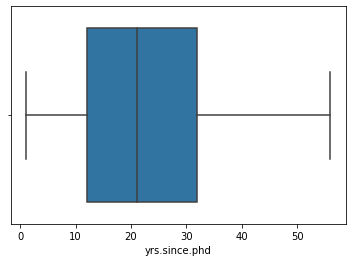

In [47]:
sns.boxplot(df['yrs.since.phd'])

Yrs.since.phd has no outliers.

<AxesSubplot:xlabel='yrs.service'>

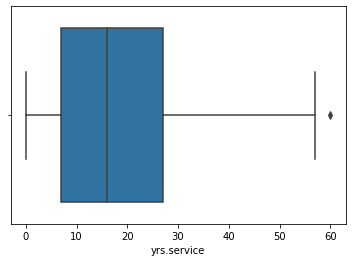

In [48]:
sns.boxplot(df['yrs.service'])

Yrs. service has one outlier.

<AxesSubplot:xlabel='salary'>

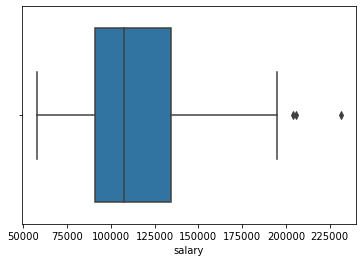

In [49]:
sns.boxplot(df['salary'])

Salary has a three outliers.

### Skewness

In [50]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Skewness threshold taken is +/-0.5

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

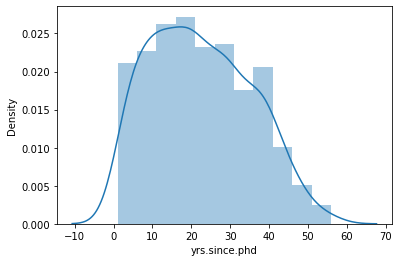

In [51]:
sns.distplot(df['yrs.since.phd'])

The data is not normalised.

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

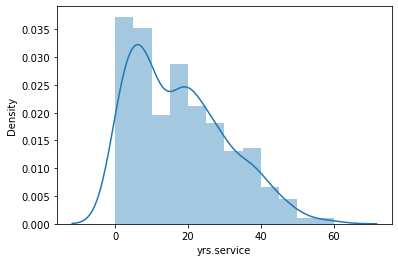

In [52]:
sns.distplot(df['yrs.service'])

Data is not normalised. Building blocks are out of the normal data.

<AxesSubplot:xlabel='salary', ylabel='Density'>

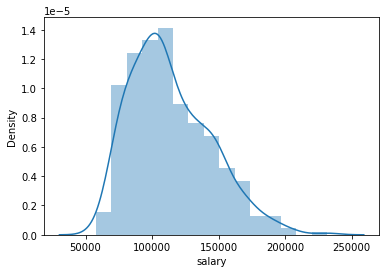

In [53]:
sns.distplot(df['salary'])

The data is not normalised.

### Removing Outliers

Z Score Technique

In [54]:
from scipy.stats import zscore
z = np.abs((zscore(df)))
z

array([[0.64925739, 0.91540317, 0.25754973, 0.02966908, 0.3300584 ,
        0.86091884],
       [0.64925739, 0.91540317, 0.17985426, 0.12429986, 0.3300584 ,
        1.96667226],
       [0.67256406, 0.91540317, 1.42298184, 1.12509795, 0.3300584 ,
        1.12249537],
       ...,
       [0.64925739, 1.09241483, 1.52944617, 0.56856036, 0.3300584 ,
        0.39564018],
       [0.64925739, 1.09241483, 0.20862311, 0.20128433, 0.3300584 ,
        0.60750187],
       [0.67256406, 1.09241483, 1.11219995, 1.04811348, 0.3300584 ,
        1.08001725]])

In [55]:
Threshold = 3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [56]:
ds = df[(z<3).all(axis=1)]
print(df.shape)
print(ds.shape)

(397, 6)
(354, 6)


### Percentage Data loss

In [57]:
percent_loss = (397-354)/397*100
percent_loss

10.831234256926953

### Model with Outliers is df

In [59]:
x = ds.iloc[:,:-1]
y = ds.iloc[:,-1]

### Transforming Data to remove Skewness

In [60]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

### Model without Outlier

In [85]:
x = ds.iloc[:,0:6]
x

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


### Prepared Data

In [63]:
x = ds.iloc[:,0:-1]
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,1.0,19,18,1.0
1,2.0,1.0,20,16,1.0
2,1.0,1.0,4,3,1.0
3,2.0,1.0,45,39,1.0
4,2.0,1.0,40,41,1.0
...,...,...,...,...,...
392,2.0,0.0,33,30,1.0
393,2.0,0.0,31,19,1.0
394,2.0,0.0,42,25,1.0
395,2.0,0.0,25,15,1.0


In [64]:
y = ds["salary"]
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 354, dtype: int64

In [65]:
x.shape

(354, 5)

In [66]:
y.shape

(354,)

### Split data into train and test

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=42)

In [68]:
x_train.shape

(247, 5)

In [69]:
y_train.shape

(247,)

In [70]:
x_test.shape

(107, 5)

In [71]:
y_test.shape

(107,)

### Define Linear Regression

In [72]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Test Model

In [73]:
pred = lr.predict(x_test)
pred

array([119269.2828155 , 124674.59376801,  85591.4042835 , 128951.82110966,
       133002.02374299,  89398.30621953, 120784.20236468, 130999.51315538,
       100196.17087051, 112716.22130209, 104610.06000423,  88776.45470624,
       122772.83828052, 125653.25833276,  78183.58274338, 111578.86292508,
       106983.13054116,  87320.59128695, 113308.04992853, 120920.86415676,
       124356.08872574,  86781.9349853 , 116037.93351691, 139053.61954619,
        85272.89924123, 104223.22406591, 110191.33040182, 108143.6383561 ,
       114006.51746018, 121557.87424131, 119974.62379609,  90642.30350177,
       115355.74197425, 100833.18095506, 105089.66017599, 133957.53886981,
       120611.63388064, 121944.71017962,  79525.93380852,  81505.2949582 ,
       135936.90001949, 102562.3679585 , 121944.71017962, 138562.54601987,
       114763.91334782, 100514.67591278,  86615.25030636,  84635.88915668,
        87570.76543319,  75498.88061311, 114787.06278574, 114445.40830554,
       122636.17648844,  

In [74]:
y_test

251    102000
50     126621
321     95642
206    162200
66     101000
        ...  
266    143940
220    170000
284     88650
392    103106
328     99247
Name: salary, Length: 107, dtype: int64

In [75]:
pred = lr.predict(x_test)
pred

array([119269.2828155 , 124674.59376801,  85591.4042835 , 128951.82110966,
       133002.02374299,  89398.30621953, 120784.20236468, 130999.51315538,
       100196.17087051, 112716.22130209, 104610.06000423,  88776.45470624,
       122772.83828052, 125653.25833276,  78183.58274338, 111578.86292508,
       106983.13054116,  87320.59128695, 113308.04992853, 120920.86415676,
       124356.08872574,  86781.9349853 , 116037.93351691, 139053.61954619,
        85272.89924123, 104223.22406591, 110191.33040182, 108143.6383561 ,
       114006.51746018, 121557.87424131, 119974.62379609,  90642.30350177,
       115355.74197425, 100833.18095506, 105089.66017599, 133957.53886981,
       120611.63388064, 121944.71017962,  79525.93380852,  81505.2949582 ,
       135936.90001949, 102562.3679585 , 121944.71017962, 138562.54601987,
       114763.91334782, 100514.67591278,  86615.25030636,  84635.88915668,
        87570.76543319,  75498.88061311, 114787.06278574, 114445.40830554,
       122636.17648844,  

In [76]:
print(r2_score(y_test,pred))

0.32938136012533037


In [86]:
def train(model,x,y):
    model.fit(x,y)
    pred = model.predict(x)
    cv_score = cross_val_score(model,x,y,scoring = 'neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    print('Model Report')
    print('MSE',mean_squared_error(y,pred))
    print('CV',cv_score)

Model Report
MSE 5.102536045253659e-22
CV 4.845386359539917e-22


<AxesSubplot:title={'center':'Model Coefficients'}>

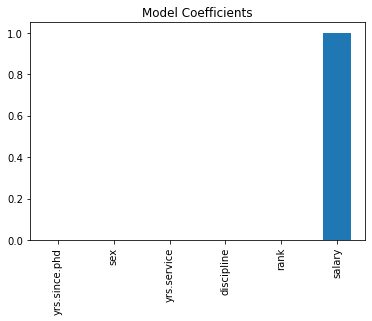

In [87]:
model = LinearRegression()
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Model Coefficients')

Model Report
MSE 191273056.1517199
CV 202973170.87459344


<AxesSubplot:title={'center':'Model Coefficients'}>

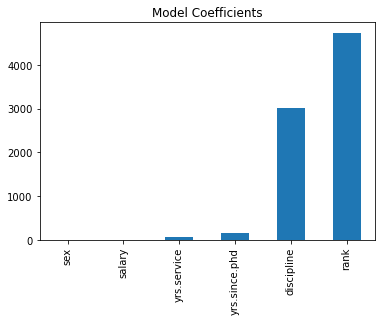

In [88]:
model = Ridge(normalize=True)
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Model Coefficients')

Model Report
MSE 1.1745045736451923e-09
CV 1.21531868927857e-09


<AxesSubplot:title={'center':'Model Coefficients'}>

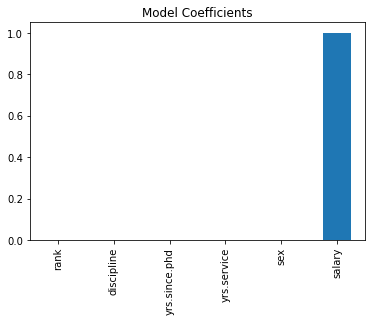

In [89]:
model = Lasso()
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Model Coefficients')

Model Report
MSE 0.0
CV 1008104.3855533202


<AxesSubplot:title={'center':'Feature Importance'}>

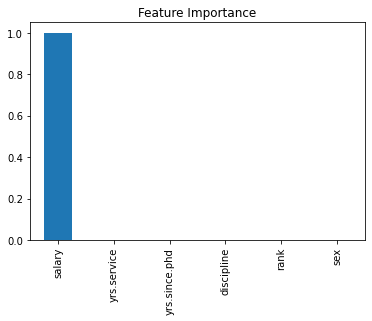

In [91]:
model = DecisionTreeRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind = 'bar',title = 'Feature Importance')

Model Report
MSE 129993.21077627085
CV 1114721.8696987072


<AxesSubplot:title={'center':'Feature Importance'}>

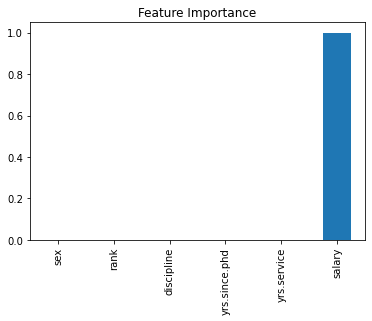

In [92]:
model = RandomForestRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Feature Importance')

Model Report
MSE 0.0
CV 1476594.4633587548


<AxesSubplot:title={'center':'Feature Importance'}>

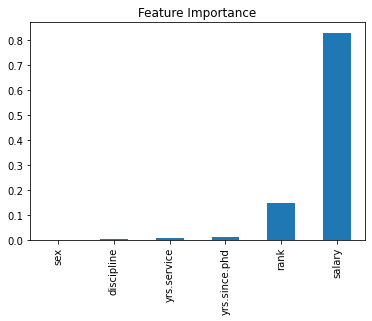

In [93]:
model = ExtraTreesRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Feature Importance')

For this we can use Extra tree regression model because it shows predicted Salary bargraph properly than others.